## How do measurement errors depend on the true fitness of a mutation?

Intuitively, it makes sense that measurements are likelier to be worse for deleterious mutations, because with selection, the expected number of counts will approach 0, and the Poisson noise in measurements dominates our measurements.

Here, I try to formalize this intuition by estimating error bounds for a mutation with a known "true" fitness

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fitness_range = np.linspace(-0.15, 0.05, 1000)   #initial focus: genes near neutrality

### Definition of upper and lower bounds

This is only an approximation to get a sense of how errors depend on a range of experimental parameters, and build intuition for how to design bulk fitness assay experiments. It is not a precise estimate, and should not be interpreted as such.

- $ s = \dfrac{log\Big(\frac{N_{t1}}{N_{t0}}\Big)}{t_{fa}} $
- upper bound: $ s = \dfrac{log\Big(\frac{N_{t1}+\sqrt{N_{t1}}}{N_{t0}-\sqrt{N_{t0}}}\Big)}{t_{fa}} $, lower bound: $ s = \dfrac{log\Big(\frac{N_{t1}-\sqrt{N_{t1}}}{N_{t0}+\sqrt{N_{t0}}}\Big)}{t_{fa}} $

Rationale:
- the uncertainty in counts for an expected count of $N$ is $ \sqrt{N}$. The upper bound in error is when the numerator takes the highest possible value, and denominator takes the lowest possible value. 
- vice versa for lower bound

In [35]:
def estimator(coverage, t_library, t_recovery, t_assay, fitness_range):
    """
    Inputs:
    coverage: what is the average number of counts per gene (in experiments)
    t_library: number of generations of selection while constructing library
    t_recovery: number of generations of recovery from freezer stock
    t_assay: number of generations in the fitness assay
    fitness_range: the range for which we want error bounds in fitness measurements
    
    Output:
    upper and lower bound in fitness for each measurement
    
    """
    
    #t0 is the start of the fitness assay. 
    #Assumption that all mutants exhibit exponential growth  
    coverage_site_t0 = coverage*np.exp(fitness_range*(t_library+t_recovery))
    #After the fitness assay
    coverage_site_t1 = coverage_site_t0*(1+fitness_range)**t_assay
    #bounds
    upper = np.log((coverage_site_t1 + coverage_site_t1**0.5)/((coverage_site_t0 - coverage_site_t0**0.5)))/t_assay
    lower = np.log((coverage_site_t1 - coverage_site_t1**0.5)/((coverage_site_t0 + coverage_site_t0**0.5)))/t_assay
    
    #returning bounds
    
    return upper, lower

### Defining fixed parameters

In [11]:
t_kan = 20 #number of generations of selection during library construction
t_fa = np.log2(100)  #number of generations in the fitness assay (this corresponds to the LTEE generations/day)
fitness_range = np.linspace(-0.2, 0.1, 1000)

Coverage per mutation: 100X, t_recovery = 6

In [15]:
coverage, t_rec = 100, 6

In [16]:
upper, lower = estimator(coverage=coverage, t_library=t_kan, t_recovery=t_rec, t_assay=t_fa,fitness_range=fitness_range)

/var/folders/f8/92wybs9d7wqfthlqj1drht_c0000gn/T/ipykernel_63398/3885093766.py:21: RuntimeWarning: invalid value encountered in log
  upper = np.log((coverage_site_t1 + coverage_site_t1**0.5)/((coverage_site_t0 - coverage_site_t0**0.5)))/t_fa
/var/folders/f8/92wybs9d7wqfthlqj1drht_c0000gn/T/ipykernel_63398/3885093766.py:22: RuntimeWarning: invalid value encountered in log
  lower = np.log((coverage_site_t1 - coverage_site_t1**0.5)/((coverage_site_t0 + coverage_site_t0**0.5)))/t_fa


(-0.4, 0.2)

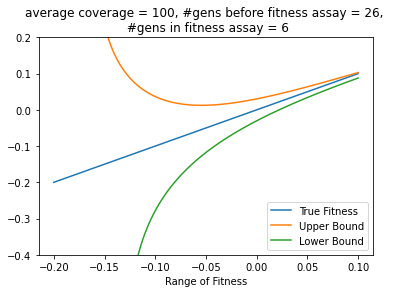

In [17]:
plt.plot(fitness_range, fitness_range,label='True Fitness')
plt.plot(fitness_range, upper,label='Upper Bound')
plt.plot(fitness_range, lower,label="Lower Bound")
plt.xlabel('Range of Fitness')
plt.legend(loc=0)
plt.title('average coverage = %i, #gens before fitness assay = %i, \n #gens in fitness assay = %i' % (coverage, t_kan+t_rec ,t_fa))
plt.ylim(-0.4,0.2)


As expected, upper and lower bounds are quite close for neutral mutations, but diverges for more deleterious mutations. Next, I will play around with changing some parameters.

/var/folders/f8/92wybs9d7wqfthlqj1drht_c0000gn/T/ipykernel_63398/3885093766.py:22: RuntimeWarning: invalid value encountered in log
  lower = np.log((coverage_site_t1 - coverage_site_t1**0.5)/((coverage_site_t0 + coverage_site_t0**0.5)))/t_fa


(-0.4, 0.2)

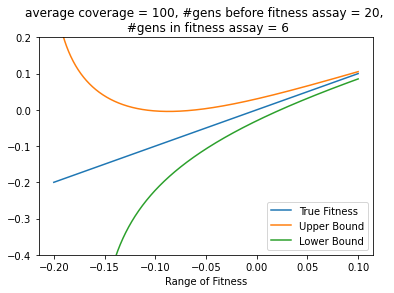

In [18]:
coverage, t_rec = 100, 0
upper, lower = estimator(coverage=coverage, t_library=t_kan, t_recovery=t_rec, t_assay=t_fa,fitness_range=fitness_range)
plt.plot(fitness_range, fitness_range,label='True Fitness')
plt.plot(fitness_range, upper,label='Upper Bound')
plt.plot(fitness_range, lower,label="Lower Bound")
plt.xlabel('Range of Fitness')
plt.legend(loc=0)
plt.title('average coverage = %i, #gens before fitness assay = %i, \n #gens in fitness assay = %i' % (coverage, t_kan+t_rec ,t_fa))
plt.ylim(-0.4,0.2)



If we have no recovery in media before fitness assay, the errors improve for the deleterious mutations; this is because they have not been outcompeted to the same extent; as the number of expected counts is higher, errors are much smaller.

### How does the depth of sequencing impact the upper and lower bounds (with and without recovery)?

/var/folders/f8/92wybs9d7wqfthlqj1drht_c0000gn/T/ipykernel_63398/3885093766.py:22: RuntimeWarning: invalid value encountered in log
  lower = np.log((coverage_site_t1 - coverage_site_t1**0.5)/((coverage_site_t0 + coverage_site_t0**0.5)))/t_fa


(-0.4, 0.2)

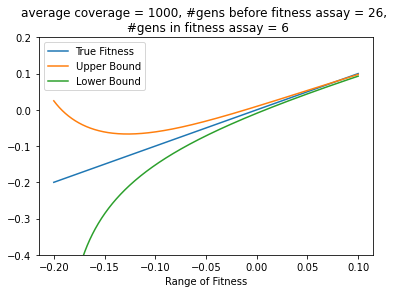

In [19]:
coverage, t_rec = 1000, 6
upper, lower = estimator(coverage=coverage, t_library=t_kan, t_recovery=t_rec, t_assay=t_fa,fitness_range=fitness_range)
plt.plot(fitness_range, fitness_range,label='True Fitness')
plt.plot(fitness_range, upper,label='Upper Bound')
plt.plot(fitness_range, lower,label="Lower Bound")
plt.xlabel('Range of Fitness')
plt.legend(loc=0)
plt.title('average coverage = %i, #gens before fitness assay = %i, \n #gens in fitness assay = %i' % (coverage, t_kan+t_rec ,t_fa))
plt.ylim(-0.4,0.2)


(-0.4, 0.2)

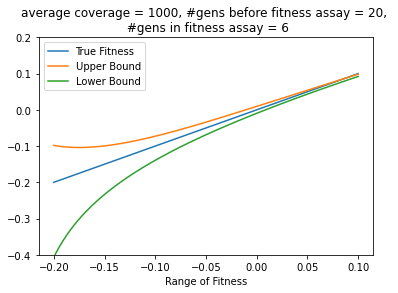

In [20]:
coverage, t_rec = 1000, 0
upper, lower = estimator(coverage=coverage, t_library=t_kan, t_recovery=t_rec, t_assay=t_fa,fitness_range=fitness_range)
plt.plot(fitness_range, fitness_range,label='True Fitness')
plt.plot(fitness_range, upper,label='Upper Bound')
plt.plot(fitness_range, lower,label="Lower Bound")
plt.xlabel('Range of Fitness')
plt.legend(loc=0)
plt.title('average coverage = %i, #gens before fitness assay = %i, \n #gens in fitness assay = %i' % (coverage, t_kan+t_rec ,t_fa))
plt.ylim(-0.4,0.2)


This is very interesting; increasing the sequencing depth seems to make a huge difference in the estimates for deleterious mutations, even with the 6 generations of recovery. 

### This is great; it suggests that increasing sequencing depth per mutation has a much larger impact on improving fitness estimates for slightly deleterious mutations. Next, I want to examine how estimates in highly deleterious mutations depend on experimental params.

It is fairly evident that we need high sequencing depth otherwise we will never detect deleterious mutations

In [21]:
fitness_range2 = np.linspace(-0.4, 0, 2000)

/var/folders/f8/92wybs9d7wqfthlqj1drht_c0000gn/T/ipykernel_63398/3885093766.py:21: RuntimeWarning: invalid value encountered in log
  upper = np.log((coverage_site_t1 + coverage_site_t1**0.5)/((coverage_site_t0 - coverage_site_t0**0.5)))/t_fa
/var/folders/f8/92wybs9d7wqfthlqj1drht_c0000gn/T/ipykernel_63398/3885093766.py:22: RuntimeWarning: invalid value encountered in log
  lower = np.log((coverage_site_t1 - coverage_site_t1**0.5)/((coverage_site_t0 + coverage_site_t0**0.5)))/t_fa


(-0.4, 0.2)

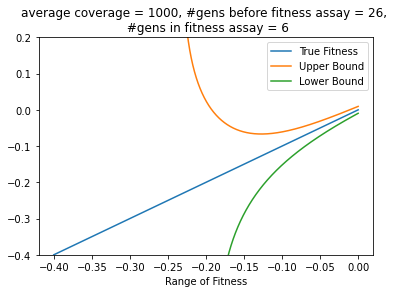

In [24]:
coverage, t_rec = 1000, 6
upper, lower = estimator(coverage=coverage, t_library=t_kan, t_recovery=t_rec, t_assay=t_fa,fitness_range=fitness_range2)
plt.plot(fitness_range2, fitness_range2,label='True Fitness')
plt.plot(fitness_range2, upper,label='Upper Bound')
plt.plot(fitness_range2, lower,label="Lower Bound")
plt.xlabel('Range of Fitness')
plt.legend(loc=0)
plt.title('average coverage = %i, #gens before fitness assay = %i, \n #gens in fitness assay = %i' % (coverage, t_kan+t_rec ,t_fa))
plt.ylim(-0.4,0.2)

/var/folders/f8/92wybs9d7wqfthlqj1drht_c0000gn/T/ipykernel_63398/3885093766.py:21: RuntimeWarning: invalid value encountered in log
  upper = np.log((coverage_site_t1 + coverage_site_t1**0.5)/((coverage_site_t0 - coverage_site_t0**0.5)))/t_fa
/var/folders/f8/92wybs9d7wqfthlqj1drht_c0000gn/T/ipykernel_63398/3885093766.py:22: RuntimeWarning: invalid value encountered in log
  lower = np.log((coverage_site_t1 - coverage_site_t1**0.5)/((coverage_site_t0 + coverage_site_t0**0.5)))/t_fa


(-0.4, 0.2)

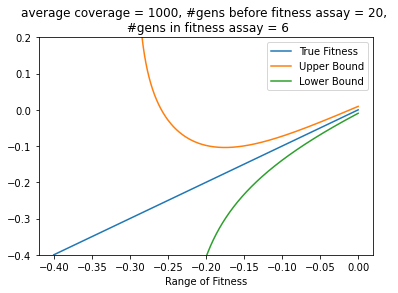

In [25]:
coverage, t_rec = 1000, 0
upper, lower = estimator(coverage=coverage, t_library=t_kan, t_recovery=t_rec, t_assay=t_fa,fitness_range=fitness_range2)
plt.plot(fitness_range2, fitness_range2,label='True Fitness')
plt.plot(fitness_range2, upper,label='Upper Bound')
plt.plot(fitness_range2, lower,label="Lower Bound")
plt.xlabel('Range of Fitness')
plt.legend(loc=0)
plt.title('average coverage = %i, #gens before fitness assay = %i, \n #gens in fitness assay = %i' % (coverage, t_kan+t_rec ,t_fa))
plt.ylim(-0.4,0.2)

This suggests another important pattern: we cannot detect mutations which are highly deleterious in the library construction environment, and the fitness assay environment. 

### However, this brings up a slightly different question: if a mutation is neutral in the library construction environment, but deleterious in the fitness assay environment, how well can we estimate its effects?

To implement this in practice, I will simply set t_library to zero. This allows me to the use function I defined previously

/var/folders/f8/92wybs9d7wqfthlqj1drht_c0000gn/T/ipykernel_63398/705698410.py:22: RuntimeWarning: invalid value encountered in log
  lower = np.log((coverage_site_t1 - coverage_site_t1**0.5)/((coverage_site_t0 + coverage_site_t0**0.5)))/t_assay


(-0.6, 0.2)

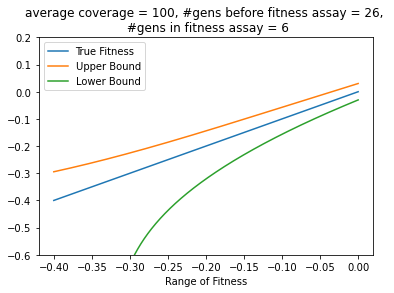

In [37]:
coverage, t_rec = 100, 6
upper, lower = estimator(coverage=coverage, t_library=0, t_recovery=t_rec, t_assay=t_fa,fitness_range=fitness_range2)
plt.plot(fitness_range2, fitness_range2,label='True Fitness')
plt.plot(fitness_range2, upper,label='Upper Bound')
plt.plot(fitness_range2, lower,label="Lower Bound")
plt.xlabel('Range of Fitness')
plt.legend(loc=0)
plt.title('average coverage = %i, #gens before fitness assay = %i, \n #gens in fitness assay = %i' % (coverage, t_kan+t_rec ,t_fa))
plt.ylim(-0.6,0.2)

So, mutations that are neutral during library construction but deleterious during selection can estimated much better.

Note that the errors in fitness estimates start getting worse around -0.3; the lower bound is nearly -0.6, which turns out to be nearly indistinguishable from a lethal mutation (or a loss of an essential gene).

This suggests that there may be challenges in identifying whether a mutation is highly deleterious or lethal.